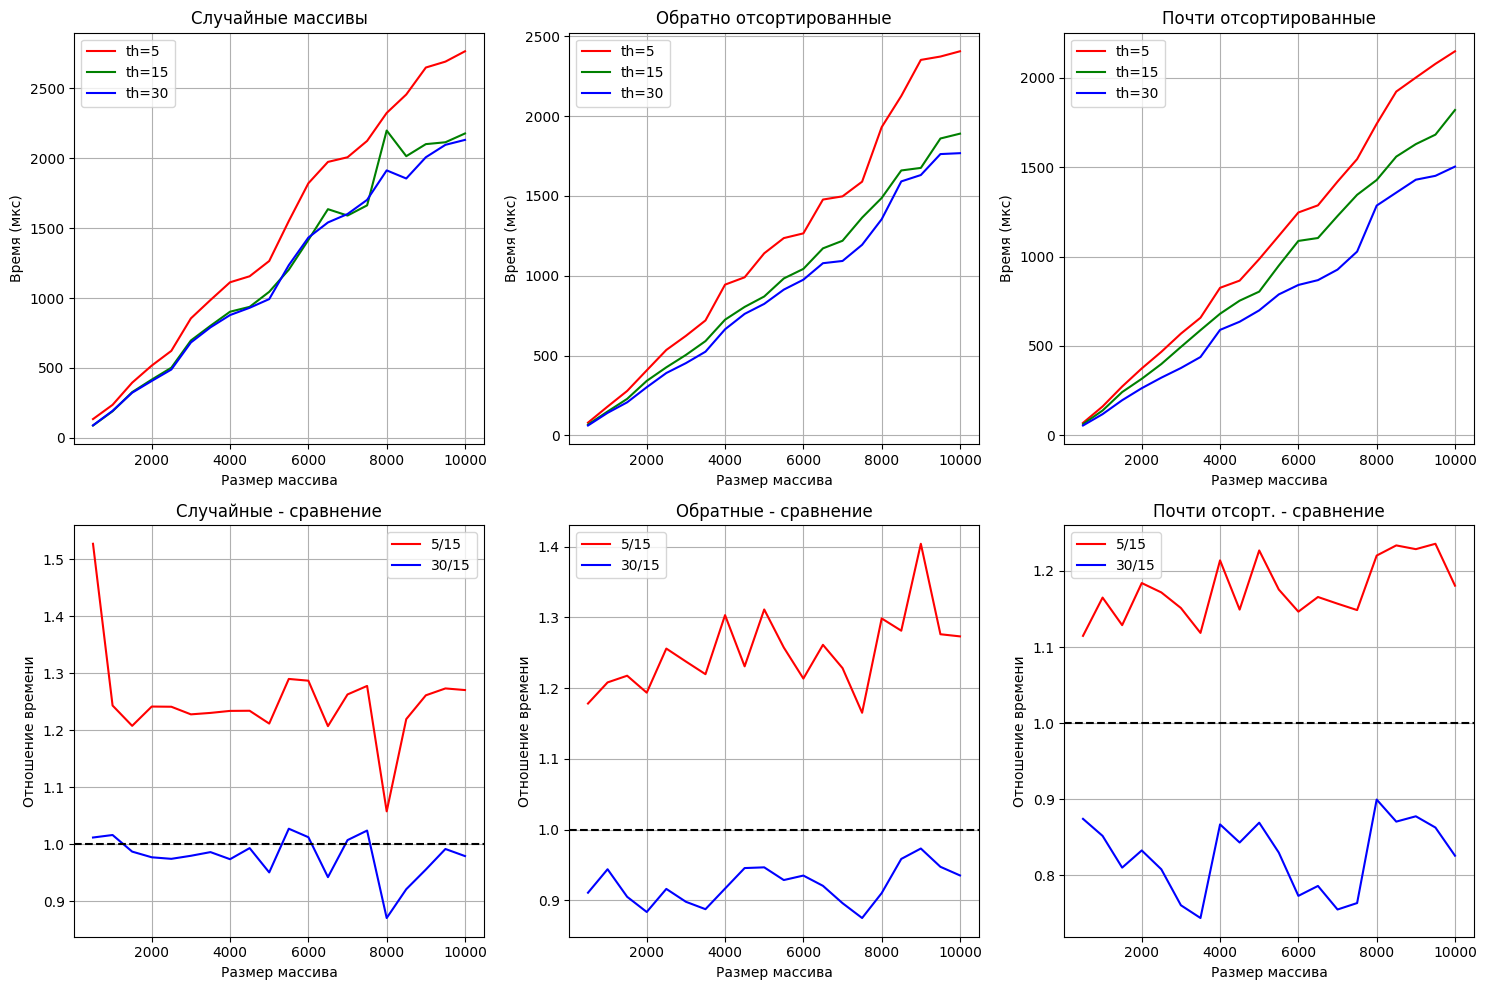

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import io

# это данные скопированные из консоли при запуске алгоритма в c++
data = """
500,133.333,87.3333,88.3333,79.3333,67.3333,61.3333,68,61,53.3333
1000,235.333,189.333,192.333,180,149,140.667,160,137.333,117
1500,394,326.333,322,278,228.333,206.667,271.667,240.667,195
2000,516.333,416,406.333,407,341,301.333,373,315,262.333
2500,621.667,501,488,535,426,390.333,466,397.667,321.333
3000,854.333,696,681.667,623.333,503.667,452.333,568,493.333,375.333
3500,985.667,801.333,790,720,590.333,524,657,587.333,437
4000,1112.67,902,878,944.333,724.667,664.333,824.667,679.333,589
4500,1155.67,936.667,930,990.333,804.667,761,865,752.667,634.667
5000,1265,1044.33,992.333,1140.67,870,823.667,985.667,803.333,698.333
5500,1551,1202.67,1235,1236,983,913,1115.67,949,787.667
6000,1821.33,1415.67,1432.67,1265.67,1043,975.333,1246.67,1087.33,840.667
6500,1974.33,1636,1541,1477.67,1171.67,1078.67,1286.67,1103.67,867.667
7000,2007.67,1590.33,1601.33,1497.67,1219.33,1092.67,1419.67,1227,926.667
7500,2124.67,1663.33,1702.67,1589.67,1364.33,1194,1545.67,1345.67,1027.67
8000,2325,2199,1913.67,1931.67,1487.67,1354.33,1743.33,1428.67,1285.33
8500,2457,2015.33,1855.67,2126.67,1660,1591.33,1924,1559.67,1358
9000,2650,2101.67,2007.67,2353,1676,1631.33,2002.33,1629.67,1430.33
9500,2692.33,2115,2096.67,2374,1860.33,1762.67,2079.33,1682.67,1452
10000,2766.33,2178,2132,2407,1890.67,1768.33,2149.67,1820.67,1503.67
"""

df = pd.read_csv(io.StringIO(data),
                 names=['Size', 'Random_5', 'Random_15', 'Random_30',
                        'Reverse_5', 'Reverse_15', 'Reverse_30',
                        'Almost_5', 'Almost_15', 'Almost_30'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].plot(df['Size'], df['Random_5'], 'r-', label='th=5')
axes[0,0].plot(df['Size'], df['Random_15'], 'g-', label='th=15')
axes[0,0].plot(df['Size'], df['Random_30'], 'b-', label='th=30')
axes[0,0].set_xlabel('Размер массива')
axes[0,0].set_ylabel('Время (мкс)')
axes[0,0].set_title('Случайные массивы')
axes[0,0].legend()
axes[0,0].grid(True)

axes[0,1].plot(df['Size'], df['Reverse_5'], 'r-', label='th=5')
axes[0,1].plot(df['Size'], df['Reverse_15'], 'g-', label='th=15')
axes[0,1].plot(df['Size'], df['Reverse_30'], 'b-', label='th=30')
axes[0,1].set_xlabel('Размер массива')
axes[0,1].set_ylabel('Время (мкс)')
axes[0,1].set_title('Обратно отсортированные')
axes[0,1].legend()
axes[0,1].grid(True)

axes[0,2].plot(df['Size'], df['Almost_5'], 'r-', label='th=5')
axes[0,2].plot(df['Size'], df['Almost_15'], 'g-', label='th=15')
axes[0,2].plot(df['Size'], df['Almost_30'], 'b-', label='th=30')
axes[0,2].set_xlabel('Размер массива')
axes[0,2].set_ylabel('Время (мкс)')
axes[0,2].set_title('Почти отсортированные')
axes[0,2].legend()
axes[0,2].grid(True)

axes[1,0].plot(df['Size'], df['Random_5']/df['Random_15'], 'r-', label='5/15')
axes[1,0].plot(df['Size'], df['Random_30']/df['Random_15'], 'b-', label='30/15')
axes[1,0].axhline(y=1.0, color='black', linestyle='--')
axes[1,0].set_xlabel('Размер массива')
axes[1,0].set_ylabel('Отношение времени')
axes[1,0].set_title('Случайные - сравнение')
axes[1,0].legend()
axes[1,0].grid(True)

axes[1,1].plot(df['Size'], df['Reverse_5']/df['Reverse_15'], 'r-', label='5/15')
axes[1,1].plot(df['Size'], df['Reverse_30']/df['Reverse_15'], 'b-', label='30/15')
axes[1,1].axhline(y=1.0, color='black', linestyle='--')
axes[1,1].set_xlabel('Размер массива')
axes[1,1].set_ylabel('Отношение времени')
axes[1,1].set_title('Обратные - сравнение')
axes[1,1].legend()
axes[1,1].grid(True)

axes[1,2].plot(df['Size'], df['Almost_5']/df['Almost_15'], 'r-', label='5/15')
axes[1,2].plot(df['Size'], df['Almost_30']/df['Almost_15'], 'b-', label='30/15')
axes[1,2].axhline(y=1.0, color='black', linestyle='--')
axes[1,2].set_xlabel('Размер массива')
axes[1,2].set_ylabel('Отношение времени')
axes[1,2].set_title('Почти отсорт. - сравнение')
axes[1,2].legend()
axes[1,2].grid(True)

plt.tight_layout()
plt.savefig('sorting_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Из графиков видно:

Insertion + Merge быстрее, тк Insertion Sort имеет меньшие константы в сложности на малых массивах. Merge Sort требует рекурсивных вызовов и создания временных массивов (это плохо, доп операции).

На почти отсортированных массивах Insertion Sort работает особенно быстро, так как делает мало сравнений и перестановок.

При пороге 5 алгоритм слишком часто переключается между Merge Sort и Insertion Sort. Каждое переключение требует проверки условия и вызова функции.

При пороге 30 алгоритм редко использует Insertion Sort и теряет его преимущества на малых массивах.

Порог 15 - самый оптимальный, так как пользуется преимуществами Insertion Sort на малых массивах и издержками переключения между алгоритмами.

На больших массивах разница больше, потому что Merge Sort делает больше рекурсивных вызовов. Гибридный алгоритм сокращает глубину рекурсии, заменяя нижние уровни рекурсии на Insertion Sort.